# RoBERTa Base - Augmented Data - All Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd
datasetPath = "/content/drive/MyDrive/Thesis/Code/GenerativeDataAugmentation/Coba14/filteredData/augJoin2.csv"
dataset = pd.read_csv(datasetPath, index_col=0, encoding="utf-8")
dataset.rename(columns={'text' : 'Text', 'emotion' : 'Emotion'}, inplace=True)

In [ ]:
dataset

,Text,Emotion
0,I do remember this and wanted nothing more tha...,anger
1,i feel the isolation and despair of the rejected,sadness
2,[NAME] damn cummonists,anger
3,Oh wait that's him.,surprise
4,I think it could be worse. A lot of people are...,fear
...,...,...
78852,i can take the pain and struggle out feeling ...,fear
78853,Our 2nd unit is as bad as anybody in the NBA,sadness
78854,Some additional background the robo-voice on t...,fear
78855,i feel really amazed and amazed and more than ...,surprise


In [ ]:
encoded_dict = {'anger':0, 'fear':1, 'joy':2, 'disgust':3, 'sadness':4, 'surprise':5}
dataset['Emotion'] = dataset.Emotion.map(encoded_dict)

In [ ]:
dataset

,Text,Emotion
0,I do remember this and wanted nothing more tha...,0
1,i feel the isolation and despair of the rejected,4
2,[NAME] damn cummonists,0
3,Oh wait that's him.,5
4,I think it could be worse. A lot of people are...,1
...,...,...
78852,i can take the pain and struggle out feeling ...,1
78853,Our 2nd unit is as bad as anybody in the NBA,4
78854,Some additional background the robo-voice on t...,1
78855,i feel really amazed and amazed and more than ...,5


In [ ]:
import numpy as np
training_data, validation_data, test_data = np.split(dataset.sample(frac=1), [int(.8*len(dataset)), int(.9*len(dataset))])

In [ ]:
training_data = training_data.reset_index().drop(['index'], axis=1)

In [ ]:
training_data

,Text,Emotion
0,I mean...that’s quite obvious. I’m just left w...,5
1,im feeling a little hesitant to post this on ...,1
2,Auba probably depreciated. Due to age and init...,4
3,You seem fun,2
4,i am feeling extremely guilty,4
...,...,...
63080,i feel so overwhelmed and overwhelmed i am a ...,5
63081,This hit way too close to home. I’m suing for ...,4
63082,i feel very insecure and like to hide it behin...,1
63083,It's so weird how popular Nandos is in Britain.,3


In [ ]:
training_data['Emotion'].value_counts()

2    11850
4    11359
1    11034
0    10380
5     9837
3     8625
Name: Emotion, dtype: int64

In [ ]:
validation_data = validation_data.reset_index().drop(['index'], axis=1)

In [ ]:
validation_data

,Text,Emotion
0,me. i’m the problem. i don’t think anyone can ...,4
1,i love folksy cities skylines man,2
2,i feel a little overwhelmed and a little foolish,5
3,...oh absolutely! ...it's really bad if they'r...,4
4,You don't. Ever. It's robbery.,3
...,...,...
7881,Take the child from them! Wtf? Theyre so dumb....,3
7882,"They probably take slight step back, by that I...",1
7883,Yeah that was inexcusable,0
7884,Like....what even is the purpose of that lie? ...,5


In [ ]:
validation_data['Emotion'].value_counts()

1    1438
2    1435
4    1417
0    1295
5    1232
3    1069
Name: Emotion, dtype: int64

In [ ]:
test_data = test_data.reset_index().drop(['index'], axis=1)

In [ ]:
test_data

,Text,Emotion
0,> And there you have it. One of the most extre...,3
1,[NAME] after he declares he loves playing Fort...,2
2,"Like I said, I’m glad that’s working out for h...",2
3,i feel quite resentful for my life,0
4,"No, it's hard to come by!",4
...,...,...
7881,Oh cool it’s another episode where lefties for...,2
7882,i feel completely terrified that i ll never b...,1
7883,"Dear [NAME], **DON'T FUCK THIS UP** Love, Me",0
7884,i was feeling extremely shitty physically this...,4


In [ ]:
test_data['Emotion'].value_counts()

2    1459
1    1412
4    1392
0    1312
5    1261
3    1050
Name: Emotion, dtype: int64

# Model 

In [ ]:
training_data.shape, test_data.shape, validation_data.shape

((63085, 2), (7886, 2), (7886, 2))

In [ ]:
!pip install transformers==4.18.0
import transformers
print(transformers.__version__)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.0 MB 5.1 MB/s 
     |████████████████████████████████| 880 kB 62.3 MB/s 
     |████████████████████████████████| 6.6 MB 8.7 MB/s 
     |████████████████████████████████| 182 kB 82.1 MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895260 sha256=ae6b0531b9e1bacd7371aa81eb8200bf415f55795c6ce0bb9e5b621cd41d203e
  Stored in directory: /root/.cache/pip/wheels/87/39/dd/a83eeef36d0bf98e7a4d1933a4ad2d660295a40613079bafc9
Successfully built sacremoses
4.18.0


In [ ]:
# Tentukan pre-trained model yang akan digunakan untuk fine-tuning
# Daftar model dapat ditemukan pada https://huggingface.co

PRE_TRAINED_MODEL = 'roberta-base'

In [ ]:
from transformers import RobertaTokenizer

bert_tokenizer = RobertaTokenizer.from_pretrained(PRE_TRAINED_MODEL)  # Load tokenizer dari pre-trained model

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/481 [00:00<?, ?B/s]

In [ ]:
# Contoh Tokenisasi

id_data = 5 # Mengambil data indeks ke-5 pada dataframe

print('Kalimat:', test_data.Text[id_data])
print('BERT Tokenizer:', bert_tokenizer.tokenize(test_data.Text[id_data]))

Kalimat: Why do all the animals look terrifying oh god oh fuck
BERT Tokenizer: ['Why', 'Ġdo', 'Ġall', 'Ġthe', 'Ġanimals', 'Ġlook', 'Ġterrifying', 'Ġoh', 'Ġgod', 'Ġoh', 'Ġfuck']


In [ ]:
# Contoh input formatting untuk BERT. Input formating dapat menggunakan fungsi `encode_plus`

bert_input = bert_tokenizer.encode_plus(
    training_data.Text[id_data],    # Sample kalimat                
    add_special_tokens = True,      # Tambahkan token [CLS] pada awal kalimat dan token [SEP] pada akhir kalimat
    padding = 'max_length',         # Tambahkan padding ke max_length menggunakan token [PAD] jika kalimat kurang dari max_length
    truncation = 'longest_first',   # Truncate jika kalimat lebih dari max_length
    max_length = 80,                # Tentukan max_length dari seluruh kalimat
    return_attention_mask = True,   # Mengembalikan nilai attention mask
    return_token_type_ids =True     # Mengembalikan nilai token type id (segment embedding)
    )

# Fungsi `encode_plus` mengembalikan 3 nilai: input_ids, token_type_ids, attention_mask
bert_input.keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])

In [ ]:
print('Kalimat\t\t:', training_data.Text[id_data])                                      # Data asli
print('Tokenizer\t:', bert_tokenizer.convert_ids_to_tokens(bert_input['input_ids']))    # Hasil input formatting + tokenizer
print('Input IDs\t:', bert_input['input_ids'])                                          # Input IDs : indeks token pada vocabulary tokenizer
print('Token Type IDs\t:', bert_input['token_type_ids'])                                # Token type IDs : menunjukkan urutan kalimat pada sequence (segment embedding)
print('Attention Mask\t:', bert_input['attention_mask'])                                # Attention mask : mengembalikan nilai [0,1]. 1 artinya token yang di masking, 0 token yang tidak di masking (diabaikan)

Kalimat		: i started back at work i have to admit that ive been feeling a little overwhelmed
Tokenizer	: ['<s>', 'i', 'Ġstarted', 'Ġback', 'Ġat', 'Ġwork', 'Ġi', 'Ġhave', 'Ġto', 'Ġadmit', 'Ġthat', 'Ġ', 'ive', 'Ġbeen', 'Ġfeeling', 'Ġa', 'Ġlittle', 'Ġoverwhelmed', '</s>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>']
Input IDs	: [0, 118, 554, 124, 23, 173, 939, 33, 7, 8109, 14, 1437, 2088, 57, 2157, 10, 410, 13203, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [ ]:
import random
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

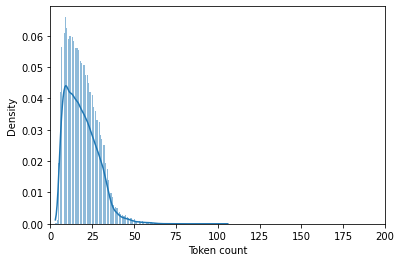

In [ ]:
'''
Ada banyak cara untuk menentukan max_length
Intuisinya adalah kita tidak ingin memotong kalimat, atau terlalu banyak menambahkan padding (komputasi lebih lama)
Contoh ini, max_lenght ditentukan dari distribusi token pada dataset 
'''
token_lens = []

for txt in training_data.Text:
  tokens = bert_tokenizer.encode(txt)
  token_lens.append(len(tokens))

sns.histplot(token_lens, kde=True, stat='density', linewidth=0)
plt.xlim([0, 200]);
plt.xlabel('Token count');

In [ ]:
# Dapat dilihat dari grafik diatas, sebagian besar kalimat tampaknya berisi kurang dari 80 token
# Maka, tentukan max_length adalah 80

MAX_LEN = 80

In [ ]:
# Buat fungsi untuk menggabungkan langkah tokenisasi, menambahkan special tokens untuk keseluruhan data sebagai input formatting ke model BERT
def convert_example_to_feature(sentence):  
  return bert_tokenizer.encode_plus(
      sentence, 
      add_special_tokens = True, 
      padding = 'max_length',
      truncation = 'longest_first',
      max_length = MAX_LEN, 
      return_attention_mask = True, 
      return_token_type_ids=True
    )

In [ ]:
# Buat fungsi untuk memetakan input hasil input formatting agar sesuai dengan model BERT
def map_example_to_dict(input_ids, attention_masks, token_type_ids, label):
  return {
      "input_ids": input_ids,               # Sebagai token embedding
      "token_type_ids": token_type_ids,     # Sebagai segment embedding
      "attention_mask": attention_masks,    # Sebagai filter informasi mana yang kalkulasi oleh model
  }, label

In [ ]:
!pip install tensorflow==2.8.0
import tensorflow as tf
print(tf.__version__)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 668.3 MB 18 kB/s 
     |████████████████████████████████| 1.4 MB 4.4 MB/s 
     |████████████████████████████████| 462 kB 65.0 MB/s 
     |████████████████████████████████| 5.8 MB 36.8 MB/s 
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.9.2
    Uninstalling tensorflow-2.9.2:
      Successfully uninstalled tensorflow-2.9.2
2.8.0


In [ ]:
# Buat fungsi untuk iterasi pada setiap kalimat pada keseluruhan data
def encode(data):
  input_ids_list = []
  token_type_ids_list = []
  attention_mask_list = []
  label_list = []
    
  for sentence, label in data.to_numpy():

    bert_input = convert_example_to_feature(sentence)
  
    input_ids_list.append(bert_input['input_ids'])
    token_type_ids_list.append(bert_input['token_type_ids'])
    attention_mask_list.append(bert_input['attention_mask'])
    label_list.append([label])

  return tf.data.Dataset.from_tensor_slices((input_ids_list, attention_mask_list, token_type_ids_list, label_list)).map(map_example_to_dict)

In [ ]:
# Tentukan nilai hyperparamter untuk fine-tuning
EPOCHS = 5
BATCH_SIZE = 32
LEARNING_RATE = 1e-5

In [ ]:
# Lakukan input formatting menggunakan fungsi sebelumnya pada data keseluruhan data
train_encoded = encode(training_data).batch(BATCH_SIZE)
test_encoded = encode(test_data).batch(BATCH_SIZE)
val_encoded = encode(validation_data).batch(BATCH_SIZE)

In [ ]:
'''
BERT untuk tugas klasifikasi sequence (teks) dengan menambahkan linear layer di atas pooled output untuk pengklasifikasi
https://huggingface.co/docs/transformers/model_doc/bert#transformers.TFBertForSequenceClassification
'''

from transformers import TFRobertaForSequenceClassification

# Load model
bert_model = TFRobertaForSequenceClassification.from_pretrained(PRE_TRAINED_MODEL, num_labels=6)

Downloading:   0%|          | 0.00/627M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

Some layers of TFRobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Tentukan optimizer dengan learning rate tertentu
# Paper aslinya menggunakan Adam Optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)

# Karena tidak menggunakan one-hot vectors, sehingga loss function dapat menggunakan sparse categorical cross entropy
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')

# Compile model
bert_model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

In [ ]:
%%time
bert_history = bert_model.fit(train_encoded, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=val_encoded)

Epoch 1/5
1972/1972 [==============================] - 1030s 512ms/step - loss: 0.7145 - accuracy: 0.7499 - val_loss: 0.5329 - val_accuracy: 0.8160
Epoch 2/5
1972/1972 [==============================] - 1009s 512ms/step - loss: 0.5126 - accuracy: 0.8241 - val_loss: 0.5230 - val_accuracy: 0.8211
Epoch 3/5
1972/1972 [==============================] - 1008s 511ms/step - loss: 0.4498 - accuracy: 0.8467 - val_loss: 0.5313 - val_accuracy: 0.8220
Epoch 4/5
1972/1972 [==============================] - 1008s 511ms/step - loss: 0.4026 - accuracy: 0.8622 - val_loss: 0.5466 - val_accuracy: 0.8204
Epoch 5/5
1972/1972 [==============================] - 1008s 511ms/step - loss: 0.3633 - accuracy: 0.8742 - val_loss: 0.5641 - val_accuracy: 0.8226
CPU times: user 57min 4s, sys: 10min 29s, total: 1h 7min 34s
Wall time: 1h 24min 55s


In [ ]:
# Buat fungsi untuk plotting hasil training
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel('Epochs')
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

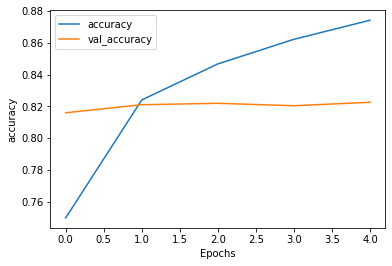

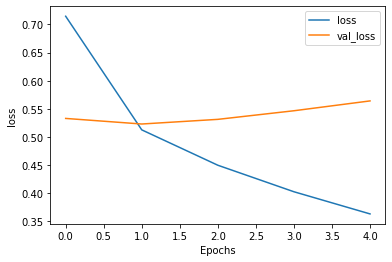

In [ ]:
plot_graphs(bert_history, 'accuracy')
plot_graphs(bert_history, 'loss')

In [ ]:
print('\nEpoch No.  Train Accuracy  Train Loss      Val Accuracy    Val Loss')
for i in range(EPOCHS):
  print('{:8d} {:10f} \t {:10f} \t {:10f} \t {:10f}'.format(i + 1, bert_history.history['accuracy'][i], bert_history.history['loss'][i], bert_history.history['val_accuracy'][i], bert_history.history['val_loss'][i]))


Epoch No.  Train Accuracy  Train Loss      Val Accuracy    Val Loss
       1   0.749877 	   0.714483 	   0.816003 	   0.532930
       2   0.824079 	   0.512611 	   0.821075 	   0.523011
       3   0.846731 	   0.449751 	   0.821963 	   0.531276
       4   0.862218 	   0.402650 	   0.820441 	   0.546566
       5   0.874201 	   0.363270 	   0.822597 	   0.564053


In [ ]:
score = bert_model.evaluate(test_encoded)

print("Test Accuracy:", score[1])

247/247 [==============================] - 42s 169ms/step - loss: 0.5947 - accuracy: 0.8107
Test Accuracy: 0.810677170753479


In [ ]:
predicted_raw = bert_model.predict(test_encoded)

In [ ]:
y_pred = np.argmax(predicted_raw['logits'], axis=1)
y_true = np.array(test_data['Emotion'])

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

accuracy_score(y_true, y_pred)

0.8106771493786457

In [ ]:
confusion_matrix(y_true, y_pred)

array([[1001,   52,   26,  139,   52,   42],
       [  36, 1245,   17,   38,   46,   30],
       [  26,   18, 1252,   30,   50,   83],
       [ 181,   63,   10,  720,   42,   34],
       [  71,   53,   27,   58, 1153,   30],
       [  42,   60,   48,   63,   26, 1022]])

In [ ]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.76      0.75      1312
           1       0.84      0.88      0.86      1412
           2       0.91      0.86      0.88      1459
           3       0.69      0.69      0.69      1050
           4       0.84      0.83      0.84      1392
           5       0.82      0.81      0.82      1261

    accuracy                           0.81      7886
   macro avg       0.81      0.80      0.80      7886
weighted avg       0.81      0.81      0.81      7886

